# Draw trajectory

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pathlib import Path
import seaborn as sns
sns.set_style("darkgrid")

from dataloader import BaseDataset
from util import *
from param import *


## animation

MovieWriter imagemagick unavailable; using Pillow instead.


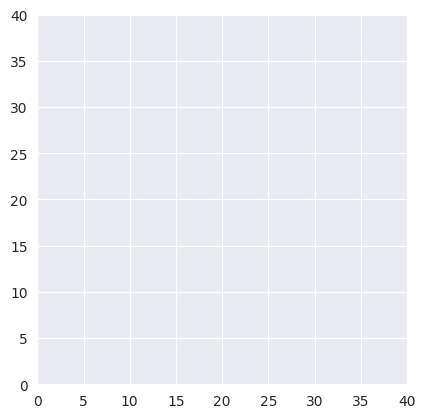

In [5]:
fig, ax = plt.subplots()
ax.set_xlim(0,40)
ax.set_ylim(0,40)

graph, = ax.plot([], [], c = "brown", lw = 2)

data_dir = ParamDir().data_list[0]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "KO" in data_name else "wild-type"

dataset = BaseDataset(data_dir, False, False)

x, y = dataset.coords_xy[:, 0]/5, dataset.coords_xy[:, 1]/5

ax.set_aspect('equal')

def plot(i):
    if i != 0:
        graph.set_data([x[i-1], x[i]], [y[i-1], y[i]])

ani = animation.FuncAnimation(fig, plot, interval=100, frames = 132)
ani.save("Sample.gif", writer = 'imagemagick')

## Graph

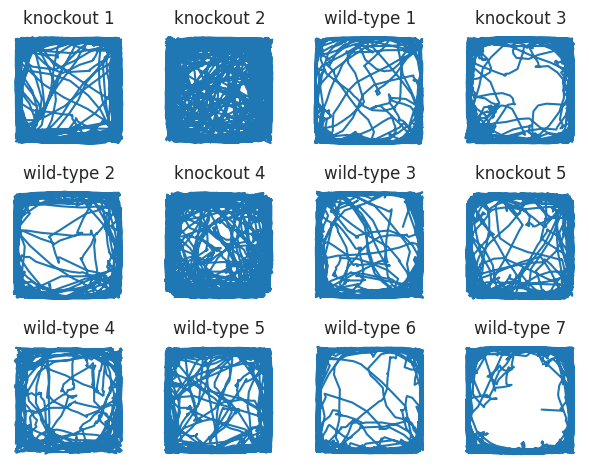

In [6]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols = 4, nrows = 3, tight_layout = True)
axes = axes.ravel()

KO_count, WT_count = 0, 0
for mouse_id, data_dir in enumerate(ParamDir().data_list):

    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "KO" in data_name else "wild-type"
    if "KO" in data_name:
        KO_count += 1
        axes[mouse_id].set_title(f"{mouse_type} {KO_count}")
    else: 
        WT_count += 1
        axes[mouse_id].set_title(f"{mouse_type} {WT_count}")

    dataset = BaseDataset(data_dir, False, False)

    x, y = dataset.coords_xy[:, 0]/5, dataset.coords_xy[:, 1]/5
    
    axes[mouse_id].set_xlim(0,40)
    axes[mouse_id].set_ylim(0,40)
    axes[mouse_id].set_aspect('equal')
    axes[mouse_id].plot(x, y )
    axes[mouse_id].axis("off")